# LAB | Central Limit Theorem and Normality Tests


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Set random seed for reproducibility
np.random.seed(42)

# Setting plot style
plt.style.use('seaborn-v0_8')

## Challenge 1: Basic Central Limit Theorem Demonstration

In this challenge, you'll explore the fundamental concept of the Central Limit Theorem
by generating samples from different distributions and observing how their sample means
approach a normal distribution as sample size increases.

# Instructions
Instructions:
1. We'll create a non-normal distribution (exponential distribution)
2. Draw samples of different sizes and calculate their means
3. Observe how the distribution of sample means approaches normal distribution
4. Complete the code below to create histograms for sample means


In [3]:
# Set parameters
population_size = 10000
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Create a non-normal population (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)

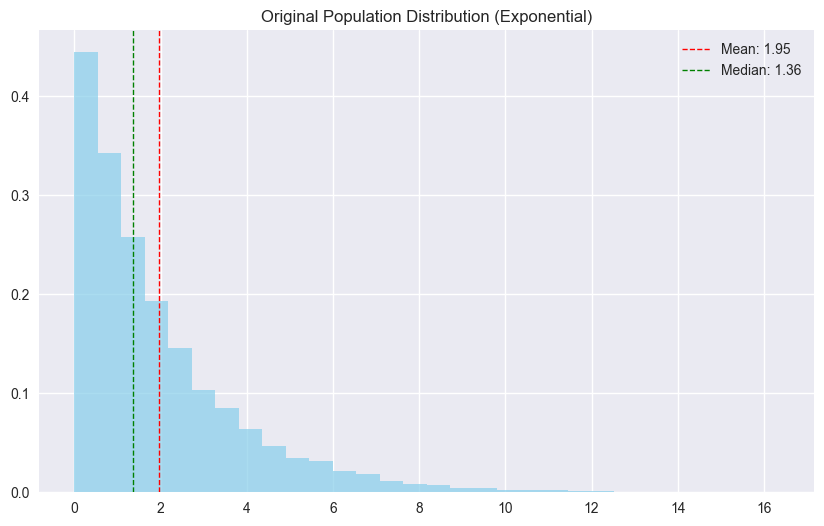

Population statistics:
Mean: 1.9550
Median: 1.3566
Variance: 3.7975
Skewness: 1.9190
Kurtosis: 5.1151



In [4]:
# Plot the original population distribution
plt.figure(figsize=(10, 6))
plt.hist(population, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(population):.2f}')
plt.axvline(np.median(population), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(population):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(population):.4f}")
print(f"Median: {np.median(population):.4f}")
print(f"Variance: {np.var(population):.4f}")
print(f"Skewness: {stats.skew(population):.4f}")
print(f"Kurtosis: {stats.kurtosis(population):.4f}\n")

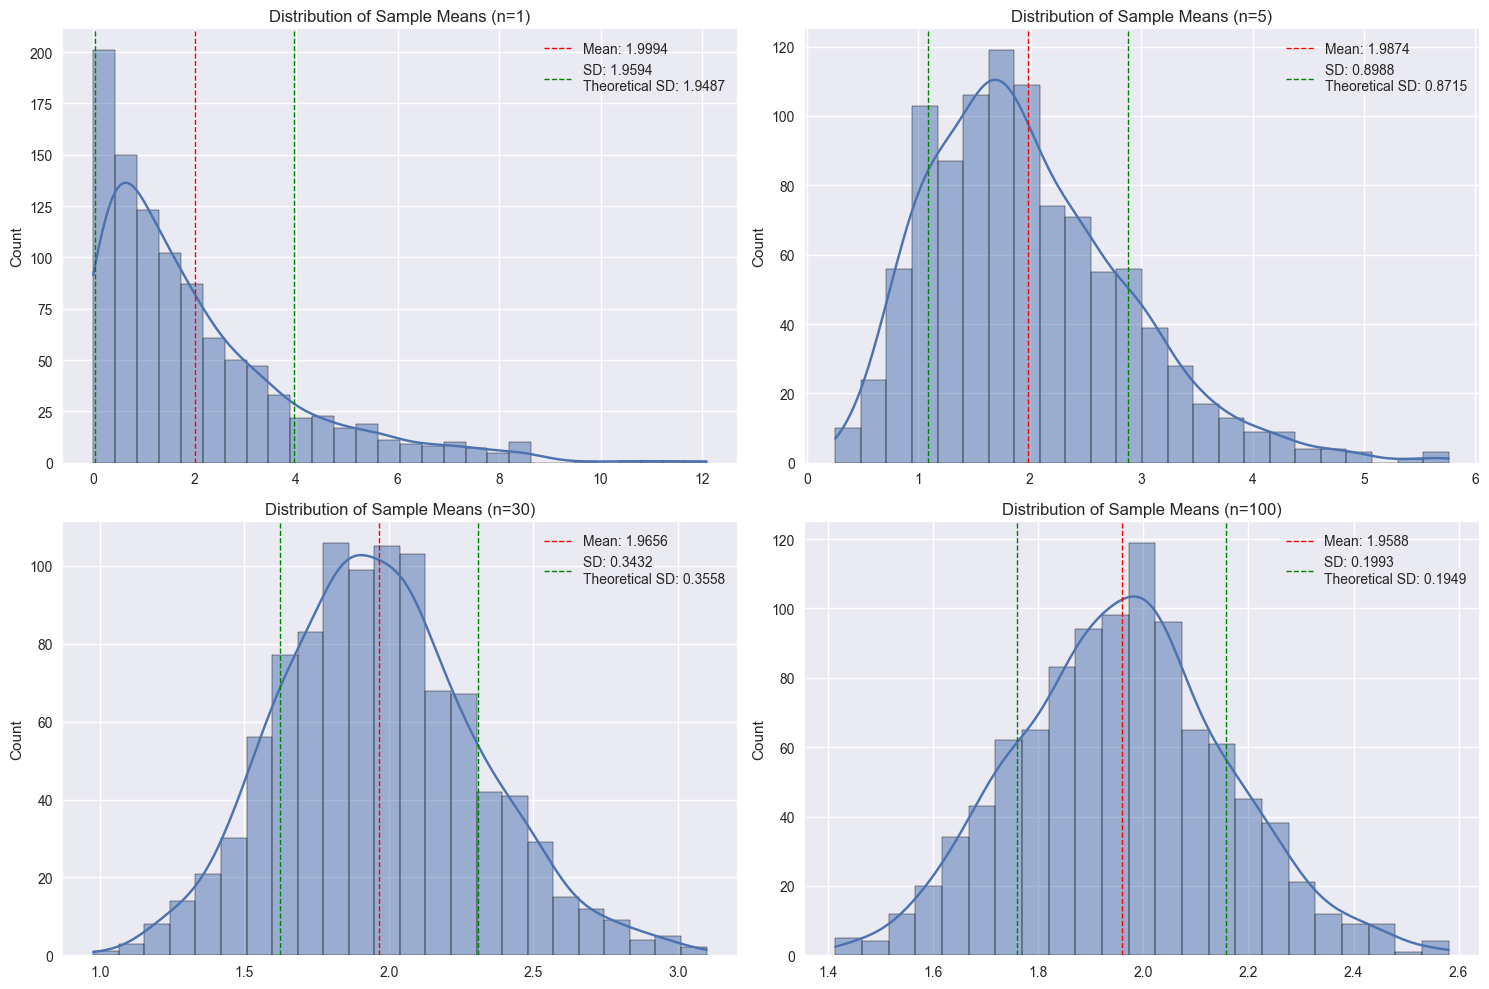

In [5]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

Your Tasks:
1. Explain what happens to the distribution of sample means as sample size increases
2. Compare the observed standard deviation of sample means with the theoretical value
3. What is the theoretical SD formula according to the CLT?
4. How does the skewness of the distribution of sample means change with sample size?

In [ ]:
# 1. As sample size increases, the distrobution of sample means becomes more normal (Gaussian)
# 2. The larger the sample size, the smaller the deviation between theoretical and obseerved SD
# 3. theoretical_std = np.std(population) / np.sqrt(sample_size)
# 4. Lower sample size increases skewness, and higher sample size descreases skewness & makes distrobution more semetrical 


## Challenge 2: CLT with Real-World Data


Now let's apply the Central Limit Theorem to a real-world dataset.
We'll use the famous Iris dataset.


In [10]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [11]:
# Preview of the Iris dataset:
display(iris_df.head())
# Summary statistics:
print(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


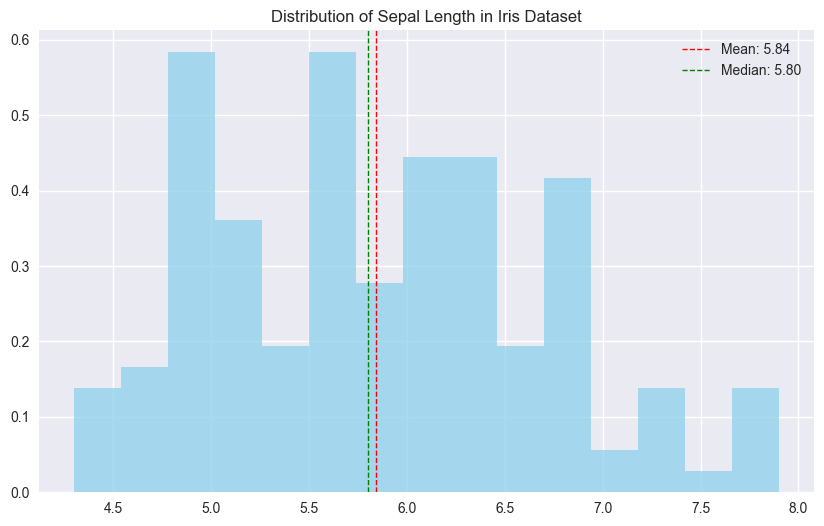

In [12]:
# Let's focus on sepal length for this exercise
sepal_length = iris_df['sepal length (cm)'].values

# Plot the original distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=15, alpha=0.7, color='skyblue', density=True)
plt.title('Distribution of Sepal Length in Iris Dataset')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

Your Tasks:
1. Complete the following code to draw samples of sepal length and compute their means
2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means
4. Test if the original data is normally distributed (using a method of your choice)

(array([2.0000e+00, 6.0000e+00, 3.0000e+01, 8.8000e+01, 1.8300e+02,
        3.4800e+02, 7.1300e+02, 1.2760e+03, 2.2420e+03, 3.6210e+03,
        5.2090e+03, 7.3160e+03, 8.9570e+03, 1.0554e+04, 1.1268e+04,
        1.1040e+04, 1.0032e+04, 8.4050e+03, 6.6660e+03, 4.6870e+03,
        3.1770e+03, 2.0350e+03, 1.0920e+03, 5.7000e+02, 2.7200e+02,
        1.2100e+02, 5.3000e+01, 2.6000e+01, 1.0000e+01, 1.0000e+00]),
 array([5.80884   , 5.81116533, 5.81349067, 5.815816  , 5.81814133,
        5.82046667, 5.822792  , 5.82511733, 5.82744267, 5.829768  ,
        5.83209333, 5.83441867, 5.836744  , 5.83906933, 5.84139467,
        5.84372   , 5.84604533, 5.84837067, 5.850696  , 5.85302133,
        5.85534667, 5.857672  , 5.85999733, 5.86232267, 5.864648  ,
        5.86697333, 5.86929867, 5.871624  , 5.87394933, 5.87627467,
        5.8786    ]),
 <BarContainer object of 30 artists>)

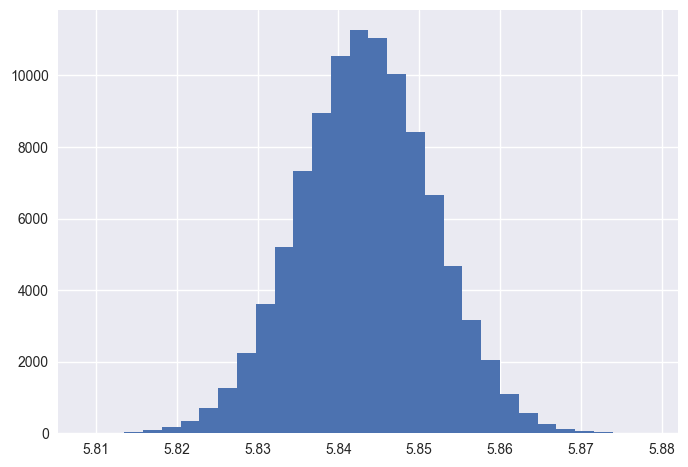

In [43]:
# 1. 1. Complete the following code to draw samples of sepal length and compute their means
sample_size = 10000
num_of_samples = 100000

#Create a for loop that takes a sample of sepals, computes its mean and adds it to the list "sample_means", 1000 times
sample_means = []

for n in range(num_of_samples):
    sample = np.random.choice(sepal_length, sample_size, replace=True)
    sample_means.append(np.mean(sample))
sample_means

#Your code goes here
plt.hist(sample_means, bins=30)

In [34]:
# 3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means

print(f"Standard deviation of the original data: {sepal_length.std()}")
      
print(f"Theoretical SD: {np.std(sepal_length) / np.sqrt(sample_size)}")

Standard deviation of the original data: 0.8253012917851409
Theoretical SD: 0.15067871141629158


(array([   2.,    6.,    8.,   30.,   68.,  108.,  177.,  285.,  480.,
         513.,  600.,  690., 1019.,  818.,  850.,  816.,  720.,  847.,
         523.,  399.,  344.,  273.,  156.,  104.,   75.,   48.,   19.,
          14.,    3.,    5.]),
 array([4.62      , 4.70466667, 4.78933333, 4.874     , 4.95866667,
        5.04333333, 5.128     , 5.21266667, 5.29733333, 5.382     ,
        5.46666667, 5.55133333, 5.636     , 5.72066667, 5.80533333,
        5.89      , 5.97466667, 6.05933333, 6.144     , 6.22866667,
        6.31333333, 6.398     , 6.48266667, 6.56733333, 6.652     ,
        6.73666667, 6.82133333, 6.906     , 6.99066667, 7.07533333,
        7.16      ]),
 <BarContainer object of 30 artists>)

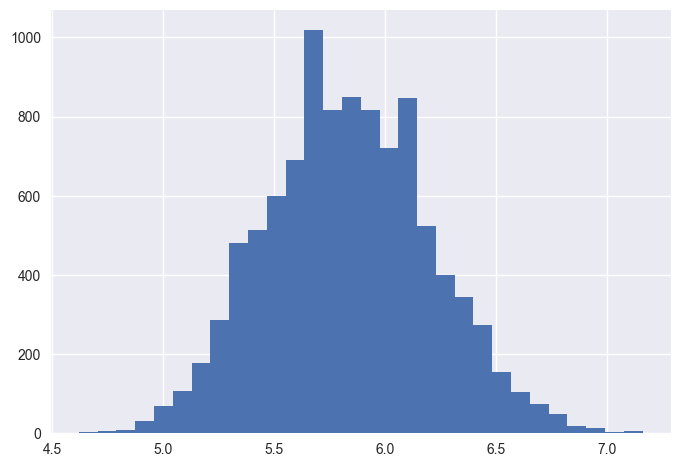

In [35]:
#2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30

# 1. 1. Complete the following code to draw samples of sepal length and compute their means
n5sample_size = 5
num_of_samples = 10000

#Create a for loop that takes a sample of sepals, computes its mean and adds it to the list "sample_means", 1000 times
sample_means = []

for n in range(num_of_samples):
    sample = np.random.choice(sepal_length, n5sample_size, replace=True)
    sample_means.append(np.mean(sample))
sample_means

#Your code goes here
plt.hist(sample_means, bins=30)

In [36]:
print(f"Standard deviation of the original data: {sepal_length.std()}")
      
print(f"Theoretical SD: {np.std(sepal_length) / np.sqrt(n5sample_size)}")

Standard deviation of the original data: 0.8253012917851409
Theoretical SD: 0.3690859580699927


(array([4.000e+00, 4.000e+00, 1.700e+01, 2.800e+01, 6.700e+01, 1.250e+02,
        1.850e+02, 3.600e+02, 5.750e+02, 6.450e+02, 8.670e+02, 9.990e+02,
        1.124e+03, 1.017e+03, 1.022e+03, 8.910e+02, 6.290e+02, 5.510e+02,
        3.450e+02, 2.280e+02, 1.420e+02, 8.700e+01, 4.300e+01, 2.700e+01,
        7.000e+00, 9.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.08666667, 5.14466667, 5.20266667, 5.26066667, 5.31866667,
        5.37666667, 5.43466667, 5.49266667, 5.55066667, 5.60866667,
        5.66666667, 5.72466667, 5.78266667, 5.84066667, 5.89866667,
        5.95666667, 6.01466667, 6.07266667, 6.13066667, 6.18866667,
        6.24666667, 6.30466667, 6.36266667, 6.42066667, 6.47866667,
        6.53666667, 6.59466667, 6.65266667, 6.71066667, 6.76866667,
        6.82666667]),
 <BarContainer object of 30 artists>)

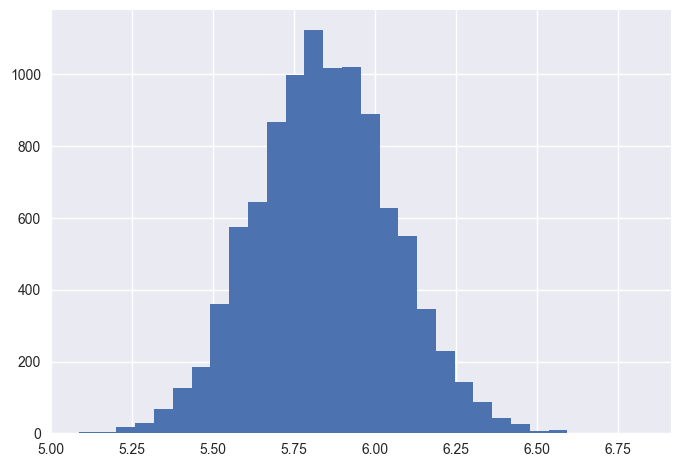

In [38]:
#2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30

# 1. 1. Complete the following code to draw samples of sepal length and compute their means
n15sample_size = 15
num_of_samples = 10000

#Create a for loop that takes a sample of sepals, computes its mean and adds it to the list "sample_means", 1000 times
sample_means = []

for n in range(num_of_samples):
    sample = np.random.choice(sepal_length, n15sample_size, replace=True)
    sample_means.append(np.mean(sample))
sample_means

#Your code goes here
plt.hist(sample_means, bins=30)

In [39]:
print(f"Standard deviation of the original data: {sepal_length.std()}")
      
print(f"Theoretical SD: {np.std(sepal_length) / np.sqrt(n15sample_size)}")

Standard deviation of the original data: 0.8253012917851409
Theoretical SD: 0.21309187724582124


(array([1.000e+00, 0.000e+00, 5.000e+00, 9.000e+00, 2.000e+01, 4.100e+01,
        1.050e+02, 1.650e+02, 2.640e+02, 3.600e+02, 5.680e+02, 7.130e+02,
        8.700e+02, 9.870e+02, 9.810e+02, 1.023e+03, 9.780e+02, 8.110e+02,
        6.970e+02, 4.690e+02, 3.450e+02, 2.520e+02, 1.520e+02, 9.300e+01,
        3.400e+01, 3.100e+01, 1.100e+01, 8.000e+00, 5.000e+00, 2.000e+00]),
 array([5.25666667, 5.296     , 5.33533333, 5.37466667, 5.414     ,
        5.45333333, 5.49266667, 5.532     , 5.57133333, 5.61066667,
        5.65      , 5.68933333, 5.72866667, 5.768     , 5.80733333,
        5.84666667, 5.886     , 5.92533333, 5.96466667, 6.004     ,
        6.04333333, 6.08266667, 6.122     , 6.16133333, 6.20066667,
        6.24      , 6.27933333, 6.31866667, 6.358     , 6.39733333,
        6.43666667]),
 <BarContainer object of 30 artists>)

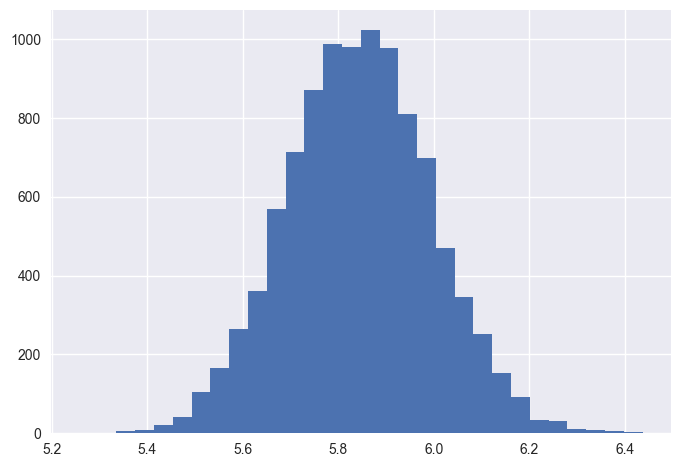

In [32]:
#2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30

# 1. 1. Complete the following code to draw samples of sepal length and compute their means
n30sample_size = 30
num_of_samples = 10000

#Create a for loop that takes a sample of sepals, computes its mean and adds it to the list "sample_means", 1000 times
sample_means = []

for n in range(num_of_samples):
    sample = np.random.choice(sepal_length, n30sample_size, replace=True)
    sample_means.append(np.mean(sample))
sample_means

#Your code goes here
plt.hist(sample_means, bins=30)

In [33]:
# 3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means

print(f"Standard deviation of the original data: {sepal_length.std()}")
      
print(f"Theoretical SD: {np.std(sepal_length) / np.sqrt(n30sample_size)}")


Standard deviation of the original data: 0.8253012917851409
Theoretical SD: 0.15067871141629158


In [46]:
# 4. Test if the original data is normally distributed (using a method of your choice)

shapiro_test_statistic, shapiro_p_value = stats.shapiro(sepal_length)

shapiro_test_statistic, shapiro_p_value

(np.float64(0.9760902723490532), np.float64(0.010181161454691156))

In [47]:
# print the test result
if shapiro_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


## Challenge 3: CLT with Different Sample Statistics


The Central Limit Theorem applies not only to sample means but also to other
statistics like medians, variances, and proportions. Let's explore this concept.


In [7]:
# Load Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

# Display of the Boston Housing dataset:
boston_df.head()


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Summary statistics for housing prices (MEDV):
boston_df['MEDV'].describe()

In [ ]:
# Let's focus on housing prices (MEDV)
housing_prices = boston_df['MEDV'].values

# Create a binary variable: 1 if price > median, 0 otherwise
median_price = np.median(housing_prices)
housing_binary = (housing_prices > median_price).astype(int)

In [ ]:
# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(housing_prices, bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.axvline(np.mean(housing_prices), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(housing_prices):.2f}')
plt.axvline(np.median(housing_prices), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(housing_prices):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing_binary, bins=2, alpha=0.7, color='salmon')
plt.title('Binary Housing Prices (Above/Below Median)')
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.ylabel('Frequency')
plt.show()

Your Tasks:
1. Implement sampling to examine the CLT's application to three different statistics:
   a) Sample means
   b) Sample medians
   c) Sample proportions (of houses above median price)
2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics
3. Compare the shapes of these three distributions
4. Discuss whether the CLT applies equally well to all three statistics.


In [ ]:
# TODO
# Your code here - implement sampling and plotting for different statistics

## Challenge 4: Testing for Normality - Visual Methods

Before applying tests that assume normality, it's important to check if data
follows a normal distribution. Let's explore visual methods first.


In [ ]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

print("Preview of the California Housing dataset:")
display(california_df.head())

In [49]:
print(california)

NameError: name 'california' is not defined

In [ ]:
print("\nSummary statistics for median income:")
print(california_df['MedInc'].describe())

In [ ]:
# We'll focus on median income for this challenge
median_income = california_df['MedInc'].values


In [ ]:
# Create some visualizations for normality assessment
plt.figure(figsize=(15, 10))

# Histogram with normal curve overlay
plt.subplot(2, 2, 1)
sns.histplot(median_income, kde=True, stat="density")
# Add theoretical normal curve
x = np.linspace(min(median_income), max(median_income), 100)
y = stats.norm.pdf(x, np.mean(median_income), np.std(median_income))
plt.plot(x, y, 'r-', linewidth=2)
plt.title('Histogram with Normal Curve')
plt.xlabel('Median Income')

# Q-Q plot
plt.subplot(2, 2, 2)
qqplot(median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=median_income)
plt.title('Box Plot')
plt.xlabel('Median Income')

# Log-transformed histogram
plt.subplot(2, 2, 4)
sns.histplot(np.log(median_income), kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Median Income)')

plt.tight_layout()
plt.show()

Your Tasks:
1. Interpret the four plots above. What do they tell you about the normality of the data?
2. Create at least two additional visualizations to assess normality
3. Discuss whether a transformation might help make the data more normal
4. Apply your chosen transformation and re-assess normality
5. When would it be important to have normally distributed data in statistical analysis?

After using Visualizations to assess normality:

6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
7. Make sure you apply the statistical test on both the original and transformed data.

In [ ]:
# Your code here - additional normality visualizations and transformations
